## 2. Machine Learning for Regression

In [453]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns

## 2.2 Data preparation

In [454]:
file_path = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [455]:
df = pd.read_csv(file_path)

In [456]:
# Check dataframe
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8343,-118.33,33.93,38.0,694.0,112.0,412.0,119.0,6.0718,156000.0,<1H OCEAN
17662,-121.88,37.27,24.0,4567.0,688.0,2102.0,695.0,5.6895,289000.0,<1H OCEAN
2242,-119.78,36.83,11.0,2754.0,663.0,1328.0,604.0,2.3667,69300.0,INLAND
15909,-122.42,37.74,52.0,1674.0,346.0,734.0,335.0,3.8864,281300.0,NEAR BAY
17023,-122.32,37.52,26.0,4042.0,591.0,1611.0,578.0,8.4693,419200.0,NEAR OCEAN
3517,-118.48,34.25,35.0,1442.0,276.0,795.0,268.0,4.9688,216900.0,<1H OCEAN
11805,-121.32,38.89,9.0,5927.0,1269.0,3369.0,1176.0,2.8194,111300.0,INLAND
6473,-118.07,34.09,40.0,1745.0,370.0,1293.0,357.0,2.5474,198100.0,<1H OCEAN
6494,-118.01,34.08,35.0,1852.0,358.0,1414.0,347.0,4.2750,173600.0,INLAND
7420,-118.20,33.96,43.0,1233.0,306.0,1190.0,282.0,2.8371,161300.0,<1H OCEAN


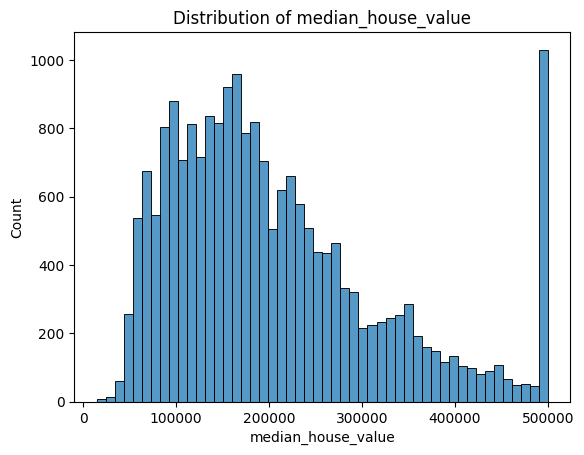

In [457]:
sns.histplot(df.median_house_value, bins=50, edgecolor='black')
plt.title('Distribution of median_house_value')
plt.show()

In [458]:
# Define values we want to keep
values_to_keep = ['<1H OCEAN', 'INLAND']

# Filter dataset to keep only required variables
df_filtered = df[df['ocean_proximity'].isin(values_to_keep)]


In [459]:
# Define columns we want to keep
columns_to_keep = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

# Keep only required columns for the project
df_filtered = df_filtered[columns_to_keep]

## Question 1


In [460]:
# Check missing values
missing_values = df_filtered.isnull().sum()
print(missing_values)

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64


## Question 2

In [461]:
df_filtered.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,35.467307,-119.217442,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,191943.020017
std,2.066387,1.780380,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,108801.077620
min,32.610000,-124.140000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,33.940000,-121.070000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,111300.000000
50%,34.160000,-118.370000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,166900.000000
75%,37.340000,-117.990000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,241100.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [462]:
median_population = df_filtered['population'].median()
print(median_population)

1195.0


In [463]:
# Set up the validation framework
n = len(df_filtered)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [464]:
# Show the required dimentions of the dataset 
n, n_val, n_test, n_train

(15687, 3137, 3137, 9413)

In [465]:
df_train = df_filtered.iloc[:n_train]
df_val = df_filtered.iloc[n_train:n_train + n_val]
df_test = df_filtered.iloc[n_train + n_val:]

In [466]:
#  Create a range of values from 0 up to (but not including) n
idx = np.arange(n)

In [467]:
# Shuffle the dataset with seed 42
np.random.seed(42)
np.random.shuffle(idx)

In [468]:
# Split the data in train/val/test sets, with 60%/20%/20% distribution
df_train = df_filtered.iloc[idx[:n_train]]
df_val = df_filtered.iloc[idx[n_train:n_train + n_val]]
df_test = df_filtered.iloc[idx[n_train + n_val:]]

In [469]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [470]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [471]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [472]:
# Apply the log transformation to the median_house_value variable using the np.log1p() function.
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [473]:
# Remove target column from the data
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Question 3

In [474]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [475]:
# Calculate RMSE
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

### Option 1: fill missing values in the column total_bedrooms with 0 

In [476]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9413 entries, 0 to 9412
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            9413 non-null   float64
 1   longitude           9413 non-null   float64
 2   housing_median_age  9413 non-null   float64
 3   total_rooms         9413 non-null   float64
 4   total_bedrooms      9319 non-null   float64
 5   population          9413 non-null   float64
 6   households          9413 non-null   float64
 7   median_income       9413 non-null   float64
dtypes: float64(8)
memory usage: 588.4 KB


In [477]:
# Filling missing values with 0
df_train_zero = df_train.copy()
df_val_zero = df_val.copy()

df_train_zero['total_bedrooms'] = df_train_zero['total_bedrooms'].fillna(0)
df_val_zero['total_bedrooms'] = df_val_zero['total_bedrooms'].fillna(0)

In [478]:
# Training and evaluating the model with 0-filled data
w0_zero, w_zero = train_linear_regression(df_train_zero.values, y_train)
y_pred_zero = w0_zero + df_val_zero.dot(w_zero)
score_zero = rmse(y_val, y_pred_zero)
score_zero

0.3408479034176266

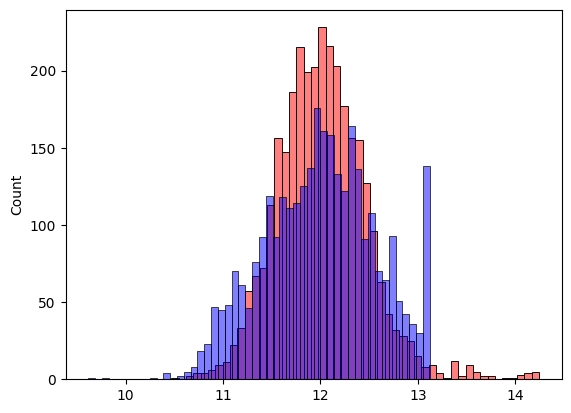

In [479]:
sns.histplot(y_pred_zero, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50);

In [480]:
score_zero


0.3408479034176266

## Option 2: fill missing values in the column total_bedrooms with mean 

In [481]:
# Filling missing values with mean
mean_value = df_train['total_bedrooms'].mean()
df_train_mean = df_train.copy()
df_val_mean = df_val.copy()

df_train_mean['total_bedrooms'] = df_train_mean['total_bedrooms'].fillna(mean_value)
df_val_mean['total_bedrooms'] = df_val_mean['total_bedrooms'].fillna(mean_value)


In [482]:
# Training and evaluating the model with mean-filled data
w0_mean, w_mean = train_linear_regression(df_train_mean.values, y_train)
y_pred_mean = w0_mean + df_val_mean.dot(w_mean)
score_mean = rmse(y_val, y_pred_mean)

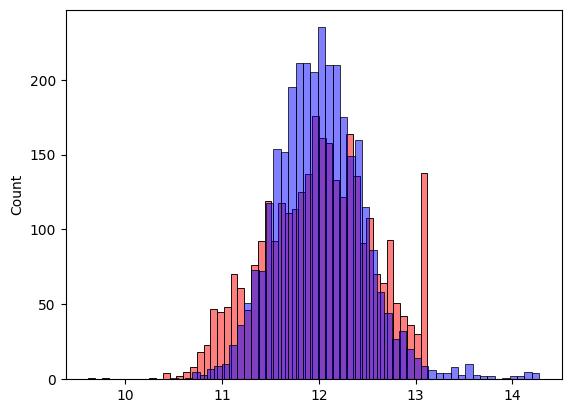

In [483]:
sns.histplot(y_val, color='red', alpha=0.5, bins=50)
sns.histplot(y_pred_mean, color='blue', alpha=0.5, bins=50);

In [484]:
rmse(y_val, y_pred_mean)

0.34056998014373

In [485]:
print(f"RMSE with zeros: {score_zero:.20f}")
print(f"RMSE with mean: {score_mean:.20f}")

RMSE with zeros: 0.34084790341762660759
RMSE with mean: 0.34056998014373002226


Answer:  Both are equally good

## Question 4

In [486]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [487]:
def prepare_X(df):
    df = df.copy()
    df['total_bedrooms'] = df['total_bedrooms'].fillna(0)
    return df.values

X_train = prepare_X(df_train)
X_val = prepare_X(df_val)  # Move this outside the loop

# Initialize variables to track the smallest score and its corresponding r value
smallest_score = float('inf')  # set to positive infinity initially
best_r = None

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)  # This stays inside the loop to get predictions for each model
    score = round(rmse(y_val, y_pred), 10)  # Adjusted precision to 2 decimals instead of 100

    # Update if the current score is smaller than the smallest score found so far
    if score < smallest_score:
        smallest_score = score
        best_r = r

    print(r, w0, score)

# Print the smallest score and its corresponding r value
print("\nSmallest score is:", smallest_score, "for r =", best_r)

0 -9.763249478052225 0.3408479034
1e-06 -9.763228830851833 0.3408479062
0.0001 -9.761185235851151 0.3408481801
0.001 -9.742646249818254 0.3408506922
0.01 -9.561056192964566 0.34087793
0.1 -8.058889769570351 0.3412862042
1 -3.1331542783778734 0.3448958328
5 -0.8410867974609664 0.347739807
10 -0.4381172316101039 0.3483149834

Smallest score is: 0.3408479034 for r = 0


## Question 5

In [503]:
rmse_scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df_filtered.iloc[idx[:n_train]]
    df_val = df_filtered.iloc[idx[n_train:n_train + n_val]]
    df_test = df_filtered.iloc[idx[n_train + n_val:]]

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']

    df_train = df_train.fillna(0)
    df_val = df_val.fillna(0)

    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    rmse_scores.append(score)
    print(f'RMSE for seed {seed}: {score}')

std_rmse = np.std(rmse_scores)
std_rmse = round(std_rmse, 3)

print(f'Standard deviation of RMSE scores: {std_rmse}')

RMSE for seed 0: 0.3397566617870557
RMSE for seed 1: 0.3423378780934794
RMSE for seed 2: 0.3417849574656917
RMSE for seed 3: 0.3330456962162494
RMSE for seed 4: 0.3303781171939423
RMSE for seed 5: 0.3374197396750389
RMSE for seed 6: 0.33611049440312407
RMSE for seed 7: 0.339038758889373
RMSE for seed 8: 0.33922513945891175
RMSE for seed 9: 0.3321521361401716
Standard deviation of RMSE scores: 0.004


## Question 6

In [504]:
np.random.seed(9)
np.random.shuffle(idx)

df_train = df_filtered.iloc[idx[:n_train]]
df_val = df_filtered.iloc[idx[n_train:n_train + n_val]]
df_test = df_filtered.iloc[idx[n_train + n_val:]]

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_train = df_train.fillna(0)
df_val = df_val.fillna(0)
df_test = df_test.fillna(0)

df_full_train = pd.concat([df_train, df_val]) # concatenate two or more dataframes or series along a particular axis (default is axis=0, which is row-wise).
X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val]) #  concatenate two or more arrays along a specified axis (default is axis=0).

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_pred_test = w0 + X_test.dot(w)
score_test = rmse(y_test, y_pred_test)

print(f'RMSE on test dataset: {score_test:.2f}')

RMSE on test dataset: 0.34
